In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train, Y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train, x_test = X_train/255, x_test/255

# Targets are 2D array
Y_train, y_test = Y_train.flatten(), y_test.flatten()

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
Y_train.shape

(50000,)

In [ ]:
# number of Classes
K = len(set(Y_train))
K

10

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.activations import relu, softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides=2, activation=relu, input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), strides=2, activation=relu))
model.add(Conv2D(128, (3, 3), strides=2, activation=relu))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(300, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(K, activation=softmax))

In [ ]:
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
r = model.fit(
    X_train,
    Y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5262 - accuracy: 0.4475 - val_loss: 1.2868 - val_accuracy: 0.5363
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1981 - accuracy: 0.5731 - val_loss: 1.0978 - val_accuracy: 0.6113
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0538 - accuracy: 0.6259 - val_loss: 1.1035 - val_accuracy: 0.6083
Epoch 4/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9402 - accuracy: 0.6647 - val_loss: 0.9358 - val_accuracy: 0.6692
Epoch 5/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8513 - accuracy: 0.6970 - val_loss: 0.9102 - val_accuracy: 0.6812


In [ ]:
import matplotlib.pyplot as plt

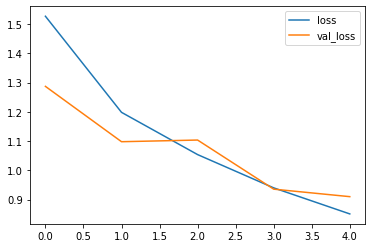

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

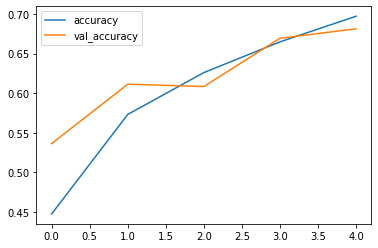

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Improve Results

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from keras.activations import relu, softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy

In [ ]:
print(MaxPooling2D.__doc__)

Max pooling operation for 2D spatial data.

  Downsamples the input along its spatial dimensions (height and width)
  by taking the maximum value over an input window
  (of size defined by `pool_size`) for each channel of the input.
  The window is shifted by `strides` along each dimension.

  The resulting output,
  when using the `"valid"` padding option, has a spatial shape
  (number of rows or columns) of:
  `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
  (when `input_shape >= pool_size`)

  The resulting output shape when using the `"same"` padding option is:
  `output_shape = math.floor((input_shape - 1) / strides) + 1`

  For example, for `strides=(1, 1)` and `padding="valid"`:

  >>> x = tf.constant([[1., 2., 3.],
  ...                  [4., 5., 6.],
  ...                  [7., 8., 9.]])
  >>> x = tf.reshape(x, [1, 3, 3, 1])
  >>> max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
  ...    strides=(1, 1), padding='valid')
  >>> max_pool_2d(x)
  

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides=2, activation=relu, padding="same", input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), strides=2, activation=relu, padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(1024, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(K, activation=softmax))

In [ ]:
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
r = model.fit(
    X_train,
    Y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
1563/1563 [==============================] - 42s 26ms/step - loss: 1.4601 - accuracy: 0.4826 - val_loss: 1.2275 - val_accuracy: 0.5634
Epoch 2/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1722 - accuracy: 0.5852 - val_loss: 1.1614 - val_accuracy: 0.5934
Epoch 3/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0388 - accuracy: 0.6350 - val_loss: 1.0574 - val_accuracy: 0.6307
Epoch 4/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9301 - accuracy: 0.6743 - val_loss: 0.9401 - val_accuracy: 0.6685
Epoch 5/5
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8398 - accuracy: 0.7061 - val_loss: 0.9825 - val_accuracy: 0.6645


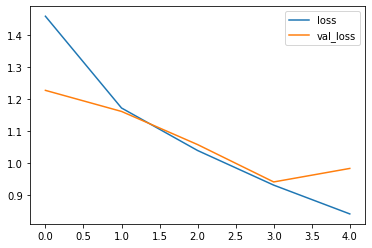

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

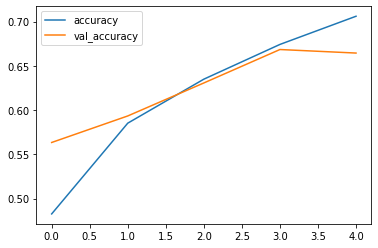

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Image Generator

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides=2, activation=relu, padding="same", input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), strides=2, activation=relu, padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(1024, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(K, activation=softmax))

In [ ]:
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = data_generator.flow(X_train, Y_train, batch_size)

steps_per_epoch = X_train.shape[0] // batch_size
steps_per_epoch

1562

In [ ]:
r = model.fit_generator(
    train_generator,
    validation_data=(x_test, y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=5
)

Epoch 1/5


<ipython-input-36-8ef34fd6e9f7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


1562/1562 [==============================] - 69s 44ms/step - loss: 1.5475 - accuracy: 0.4491 - val_loss: 1.3205 - val_accuracy: 0.5265
Epoch 2/5
1562/1562 [==============================] - 62s 40ms/step - loss: 1.3176 - accuracy: 0.5304 - val_loss: 1.2021 - val_accuracy: 0.5679
Epoch 3/5
1562/1562 [==============================] - 64s 41ms/step - loss: 1.2227 - accuracy: 0.5658 - val_loss: 1.1181 - val_accuracy: 0.5990
Epoch 4/5
1562/1562 [==============================] - 66s 42ms/step - loss: 1.1691 - accuracy: 0.5861 - val_loss: 1.1000 - val_accuracy: 0.6156
Epoch 5/5
1562/1562 [==============================] - 62s 40ms/step - loss: 1.1198 - accuracy: 0.6058 - val_loss: 1.0073 - val_accuracy: 0.6434


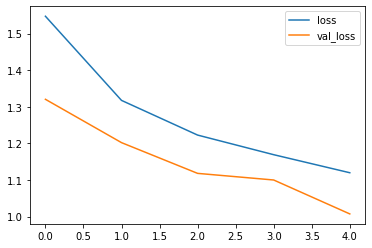

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

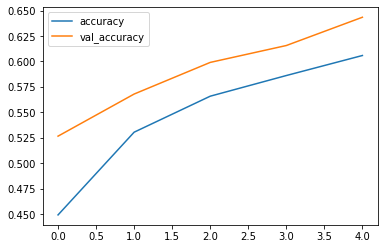

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()